#Exploratory Data Analysis

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
dataset = pd.read_csv('mtsamples.csv')


In [85]:
dataset.head(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [86]:
dataset=dataset.drop(dataset.columns[[0,1,4,5]],axis=1)
dataset.head(5)

,medical_specialty,sample_name
0,Allergy / Immunology,Allergic Rhinitis
1,Bariatrics,Laparoscopic Gastric Bypass Consult - 2
2,Bariatrics,Laparoscopic Gastric Bypass Consult - 1
3,Cardiovascular / Pulmonary,2-D Echocardiogram - 1
4,Cardiovascular / Pulmonary,2-D Echocardiogram - 2


In [87]:

print(len(dataset))

4999


In [88]:
dataset['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [89]:
len(dataset['medical_specialty'].unique())

40

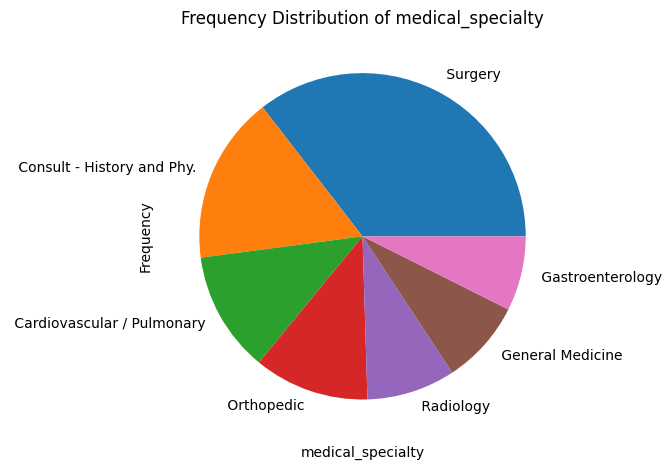

In [90]:
freq_table = dataset['medical_specialty'].value_counts().nlargest(7)

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

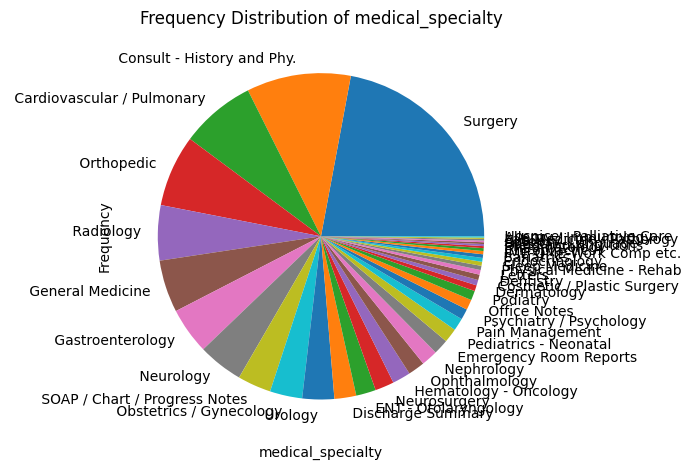

In [91]:
freq_table = dataset['medical_specialty'].value_counts()

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [92]:
df_keepsample_all=dataset
df_keepsample_all

,medical_specialty,sample_name
0,Allergy / Immunology,Allergic Rhinitis
1,Bariatrics,Laparoscopic Gastric Bypass Consult - 2
2,Bariatrics,Laparoscopic Gastric Bypass Consult - 1
3,Cardiovascular / Pulmonary,2-D Echocardiogram - 1
4,Cardiovascular / Pulmonary,2-D Echocardiogram - 2
...,...,...
4994,Allergy / Immunology,Chronic Sinusitis
4995,Allergy / Immunology,Kawasaki Disease - Discharge Summary
4996,Allergy / Immunology,Followup on Asthma
4997,Allergy / Immunology,Asthma in a 5-year-old


In [93]:

# Get the column to shift
col_to_shift = df_keepsample_all['medical_specialty']
# Drop the column from its current position
df_keepsample_all = df_keepsample_all.drop('medical_specialty', axis=1)
# Insert the column at a new position
new_position = 1  # set the new position of the column
df_keepsample_all.insert(new_position, 'medical_specialty', col_to_shift)
df_keepsample_all.head(5)

,sample_name,medical_specialty
0,Allergic Rhinitis,Allergy / Immunology
1,Laparoscopic Gastric Bypass Consult - 2,Bariatrics
2,Laparoscopic Gastric Bypass Consult - 1,Bariatrics
3,2-D Echocardiogram - 1,Cardiovascular / Pulmonary
4,2-D Echocardiogram - 2,Cardiovascular / Pulmonary


#Check for missing values
 1. Drop rows which contain ```nan``` values
 2. Replace the values in ```medical_specialty``` with values ```8``` and above with ```8```
 * Intuition: Here the value ```8``` represents ```others```

In [94]:
df_keepsample_all.isnull().any()
# There are some rows where keyword contained is NaN
#So, dropping the rows which contain Null values in keywords

sample_name          False
medical_specialty    False
dtype: bool

In [95]:
# Get the column with string labels
label_col =  df_keepsample_all['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepsample_all['medical_specialty'] = label_encoded

In [96]:
# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{' Allergy / Immunology': 0, ' Autopsy': 1, ' Bariatrics': 2, ' Cardiovascular / Pulmonary': 3, ' Chiropractic': 4, ' Consult - History and Phy.': 5, ' Cosmetic / Plastic Surgery': 6, ' Dentistry': 7, ' Dermatology': 8, ' Diets and Nutritions': 9, ' Discharge Summary': 10, ' ENT - Otolaryngology': 11, ' Emergency Room Reports': 12, ' Endocrinology': 13, ' Gastroenterology': 14, ' General Medicine': 15, ' Hematology - Oncology': 16, ' Hospice - Palliative Care': 17, ' IME-QME-Work Comp etc.': 18, ' Lab Medicine - Pathology': 19, ' Letters': 20, ' Nephrology': 21, ' Neurology': 22, ' Neurosurgery': 23, ' Obstetrics / Gynecology': 24, ' Office Notes': 25, ' Ophthalmology': 26, ' Orthopedic': 27, ' Pain Management': 28, ' Pediatrics - Neonatal': 29, ' Physical Medicine - Rehab': 30, ' Podiatry': 31, ' Psychiatry / Psychology': 32, ' Radiology': 33, ' Rheumatology': 34, ' SOAP / Chart / Progress Notes': 35, ' Sleep Medicine': 36, ' Speech - Language': 37, ' Surgery': 38, ' Urology': 39}


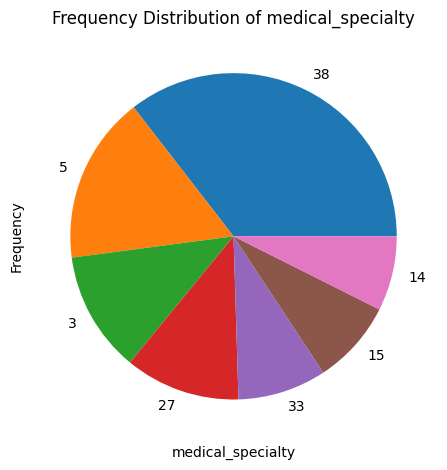

In [97]:
freq_table = df_keepsample_all['medical_specialty'].value_counts().nlargest(7)

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The Top 7 medical specialties are:
Here EV stands for encoded value which we get after using the Label Encoder



EV  Medical Specialty    

27 Orthopedic  

5 Consult- History and Phy.

3 Cardiovascular/ Pulmonary 

15 General Medicine

14 Gastroenterology

38 Surgery

33 Radiology


Replacing the vaues 8 and above in ```medical_specialty``` with 8

In [98]:
df_keepsample_all['medical_specialty'] = df_keepsample_all['medical_specialty'].apply(lambda x: 8 if x not in [38,5,3,27,33,15,14] else x)

In [99]:
# Get the column with string labels
label_col =  df_keepsample_all['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepsample_all['medical_specialty'] = label_encoded

In [100]:

# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{3: 0, 5: 1, 8: 2, 14: 3, 15: 4, 27: 5, 33: 6, 38: 7}


So the mapping becomes:
```{3: 0, 5: 1, 8: 2, 14: 3, 15: 4, 27: 5, 33: 6, 38: 7}```

Which means:
```
0- Cardiovascular/ Pulmonary
1- Consult- History and Phy.
2- Others
3- Gastroenterology
4- General Medicine
5- Orthopedic
6- Radiology
7- Surgery
```

# Checking the composition of the dataset

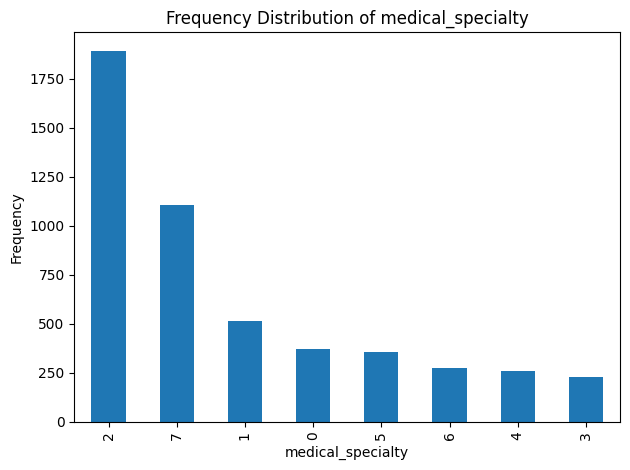

In [101]:
freq_table = df_keepsample_all['medical_specialty'].value_counts()

freq_table.plot(kind='bar')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [102]:
df_keepsample_all.to_csv('df_keepsample_all.csv', index=True)

#Text Cleaning and Preprocessing

In [103]:
df_keepsample = pd.read_csv('df_keepsample_all.csv')

In [104]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
df_keepsample['sample_name'] = df_keepsample['sample_name'].astype(str)
for i in range(0, len(df_keepsample)):
  sample_name = re.sub('[^a-zA-Z]', ' ', df_keepsample['sample_name'][i])
  sample_name = sample_name.lower()
  sample_name = sample_name.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  sample_name = [ps.stem(sn) for sn in sample_name if not sn in set(all_stopwords)]
  sample_name = ' '.join(sample_name)
  corpus.append(sample_name)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Encoding the Dependent Variable- ```medical_specialty```

In [105]:
from sklearn.preprocessing import LabelEncoder

# Get the column with string labels
label_col = df_keepsample['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepsample['medical_specialty'] = label_encoded

Get the Mapping

In [106]:
# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}


#Creating Bag of Words Model

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 150)
X = cv.fit_transform(corpus).toarray()
y = df_keepsample.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [109]:
# Resample the dataset
X_train_resampled, y_train_resampled = resample(X_train, y_train, stratify=y_train, random_state=42)


# Training the  Multinomial Naive Bayes model on the Training set

In [110]:
# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_resampled, y_train_resampled)



MultinomialNB()

# Evaluate Multinomial Naive Bayes classifier

In [111]:
# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        72
           1       0.47      0.41      0.44       117
           2       0.50      0.67      0.57       368
           3       0.44      0.14      0.22        49
           4       0.39      0.24      0.30        55
           5       0.33      0.23      0.28        64
           6       0.44      0.49      0.46        57
           7       0.45      0.38      0.41       218

    accuracy                           0.46      1000
   macro avg       0.42      0.36      0.38      1000
weighted avg       0.45      0.46      0.45      1000



#Creating a Confusion Matrix after using Multinomial NB

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 22   5  29   0   0   0   3  13]
 [  6  48  53   1   5   1   1   2]
 [  3  25 247   0  15  16  22  40]
 [  0   3  15   7   0   0   4  20]
 [  1  17  24   0  13   0   0   0]
 [  0   4  17   0   0  15   4  24]
 [ 10   0  15   0   0   1  28   3]
 [ 19   0  94   8   0  12   2  83]]


0.463

# Running a Naive Bayes Classifier

In [113]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Evaluate Naive Bayes Classifier

In [114]:
# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.35      0.37        72
           1       0.32      0.09      0.14       117
           2       1.00      0.02      0.04       368
           3       0.20      0.71      0.32        49
           4       0.10      0.89      0.19        55
           5       0.30      0.44      0.36        64
           6       0.26      0.46      0.33        57
           7       0.45      0.13      0.20       218

    accuracy                           0.21      1000
   macro avg       0.38      0.39      0.24      1000
weighted avg       0.58      0.21      0.17      1000



#Creating the Confusion Matrix after using Naive Bayes Classifier

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 25   1   0   4  28   0  14   0]
 [  7  10   0   6  88   4   2   0]
 [  7  19   8  37 198  27  37  35]
 [  0   0   0  35  13   0   1   0]
 [  1   1   0   3  49   1   0   0]
 [  0   0   0   9  15  28  11   1]
 [  2   0   0  13  14   2  26   0]
 [ 21   0   0  64  64  30  10  29]]


0.21

#Using Non Conformist + Classifier

In [116]:
!pip install nonconformist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
from nonconformist.evaluation import class_mean_errors

In [118]:
from nonconformist.nc import ClassifierNc

In [119]:
from nonconformist.cp import IcpClassifier
from nonconformist.nc import NcFactory
from nonconformist.base import ClassifierAdapter
from nonconformist.nc import ClassifierNc, MarginErrFunc

In [120]:
from tabulate import tabulate   # Import tabulate function for tabular formatting

In [121]:
# Divide the data into proper training set, calibration set and test set
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [122]:
# Create an inductive conformal classifier
icp = IcpClassifier(ClassifierNc(ClassifierAdapter(MultinomialNB()),MarginErrFunc()))
# Fit the ICP using the proper training set
icp.fit(X_train, y_train)
# Calibrate the ICP using the calibration set
icp.calibrate(X_cal, y_cal)

# There are a total of 8 labels

```
0- Cardiovascular/ Pulmonary
1- Consult- History and Phy.
2- Others
3- Gastroenterology
4- General Medicine
5- Orthopedic
6- Radiology
7- Surgery
```

In [123]:
prediction = icp.predict(X_test, significance=0.1)

predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1].round(3)
credibility = predictions[:, 2].round(3)

y_pred = predictions[:, 0].astype(int)

header = np.array(['c0-label', 'c1-label', 'c2-label','c3-label','c4-label','c5-label','c6-label','c7-label',
                   'c0-value', 'c1-value','c2-value','c3-value','c4-value','c5-value','c6-value','c7-value', 
                   'conf', 'cred', 'y-test','y-pred'])

label_map = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Orthopedic', 6: 'Radiology', 7: 'Surgery'}
# Define a function that maps integer labels to categorical names using the label_map
label_mapper = np.vectorize(lambda label: label_map[label])
# Use the label_mapper function to map the integer labels in y to categorical names
prediction_categorical = label_mapper(prediction)
y_label_names = label_mapper(y_pred)

table = np.vstack([prediction_categorical.T, prediction.T, confidence, credibility, y_label_names, y_pred]).T

df = pd.DataFrame(np.vstack([header, table]))
print(df)


                             0                          1   \
0                      c0-label                   c1-label   
1     Consult- History and Phy.  Consult- History and Phy.   
2     Consult- History and Phy.  Consult- History and Phy.   
3     Consult- History and Phy.  Consult- History and Phy.   
4     Consult- History and Phy.  Consult- History and Phy.   
...                         ...                        ...   
996   Consult- History and Phy.  Cardiovascular/ Pulmonary   
997   Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
998   Consult- History and Phy.  Consult- History and Phy.   
999   Consult- History and Phy.  Cardiovascular/ Pulmonary   
1000  Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   

                             2                          3   \
0                      c2-label                   c3-label   
1     Consult- History and Phy.  Consult- History and Phy.   
2     Consult- History and Phy.  Consult- History and Phy.   
3     C

In [124]:
prediction

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ..., False, False,  True],
       [False, False,  True, ..., False,  True, False]])

In [125]:
print(df.to_string(index=False, header=False))

                 c0-label                  c1-label                  c2-label                  c3-label                  c4-label                  c5-label                  c6-label                  c7-label c0-value c1-value c2-value c3-value c4-value c5-value c6-value c7-value  conf  cred                    y-test y-pred
Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy.     True     True     True     True     True     True     True     True  0.72 0.798                    Others      2
Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy. Consult- History and Phy.     True     True     True     True     True     True     True     True 0.561 0.736                    Others      2
Consult- History and Phy.

```

label_map = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Orthopedic', 6: 'Radiology', 7: 'Surgery'}


```

In [126]:
cardio_count = 0
consult_count = 0
others_count = 0
gastro_count = 0
genmed_count = 0
ortho_count = 0
radio_count=0
surgery_count=0

# Loop over each predicted label and update the corresponding counter
for label in y_label_names:
    if label == 'Cardiovascular/ Pulmonary':
        cardio_count += 1
    elif label == 'Consult- History and Phy.':
        consult_count += 1
    elif label == 'Others':
        others_count += 1
    elif label == 'Gastroenterology':
        gastro_count += 1
    elif label == 'General Medicine':
        genmed_count += 1    
    elif label == 'Orthopedic':
        ortho_count += 1
    elif label == 'Radiology':
        radio_count += 1
    elif label == 'Surgery':
        surgery_count += 1

# Print the results
print(f'Cardiovascular/ Pulmonary: {cardio_count}')
print(f'Consult- History and Phy.: {consult_count}')
print(f'Others: {others_count}')
print(f'Gastroenterology: {gastro_count}')
print(f'General Medicine: {genmed_count}')
print(f'Orthopedics: {ortho_count}')
print(f'Radiology count: {radio_count}')
print(f'Surgery count: {surgery_count}')


Cardiovascular/ Pulmonary: 41
Consult- History and Phy.: 123
Others: 484
Gastroenterology: 14
General Medicine: 27
Orthopedics: 33
Radiology count: 75
Surgery count: 203


In [127]:
error_rate1 = class_mean_errors(icp.predict(X_test), y_test, significance=0.1)
print('Error rate 1: {}'.format(error_rate1))


error_rate2 = class_mean_errors(icp.predict(X_test), y_test, significance=0.2)
print('Error rate 2: {}'.format(error_rate2))


error_rate3 = class_mean_errors(icp.predict(X_test), y_test, significance=0.6)
print('Error rate 3: {}'.format(error_rate3))



error_rate4 = class_mean_errors(icp.predict(X_test), y_test, significance=0.8)
print('Error rate 4: {}'.format(error_rate4))

Error rate 1: 0.118
Error rate 2: 0.22499999999999998
Error rate 3: 0.616
Error rate 4: 0.7989999999999999


In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict confidence and credibility
predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1]
credibility = predictions[:, 2]


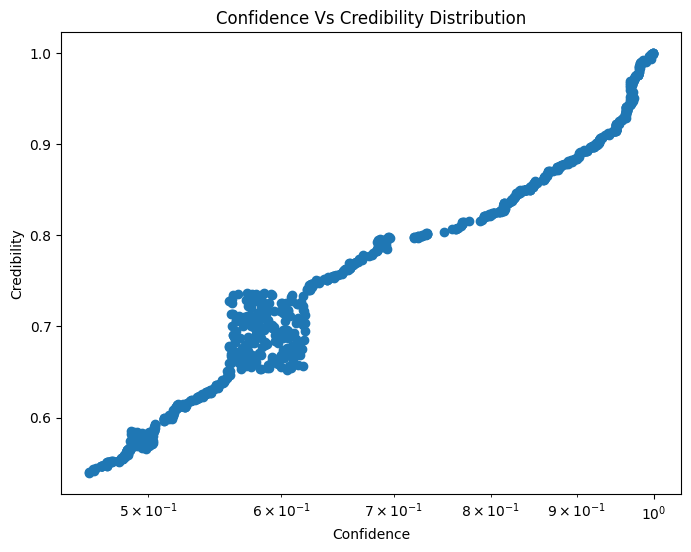

In [129]:
# Plot credibility
plt.figure(figsize=(8, 6))
plt.scatter(confidence,credibility)
plt.xscale("log")

plt.xlabel('Confidence')
plt.ylabel('Credibility')
plt.title('Confidence Vs Credibility Distribution')
plt.show()

Create a map with keys being the encoded values and values being the medical speciality

In [130]:
medical_specialty = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Orthopedic', 6: 'Radiology', 7: 'Surgery'}


In [131]:
# Produce nonconformity scores for the test set
nc_scores = icp.predict(X_test, significance=0.20)

# Obtain a set prediction for the test set
set_prediction = icp.predict(X_test, significance=None)

# Tabulate the nc_scores, set_prediction, and predicted label values side by side
table = []
for i, (nc_score, set_pred) in enumerate(zip(nc_scores, set_prediction)):
    predicted_label = medical_specialty[np.argmax(set_pred)]
    table.append([i+1, nc_score, set_pred, predicted_label])

headers = ['Instance', 'nc_score', 'set_prediction', 'predicted_label']
print(tabulate(table, headers=headers))

  Instance  nc_score                                           set_prediction                                                      predicted_label
----------  -------------------------------------------------  ------------------------------------------------------------------  -------------------------
         1  [False False  True False False False False  True]  [0.13362535 0.15177279 0.79737898 0.12543893 0.12197052 0.16232397  Others
                                                                0.1241196  0.27875402]
         2  [ True  True  True  True  True  True  True  True]  [0.25391639 0.28217361 0.72146211 0.21597051 0.22243014 0.24638457  Others
                                                                0.2270814  0.42937767]
         3  [False False False  True False False False  True]  [0.15094581 0.14809889 0.15320087 0.45787899 0.1408623  0.14401196  Surgery
                                                                0.15588093 0.62745291]
         4  [False  